In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
cd Downloads

[WinError 2] The system cannot find the file specified: 'Downloads'
C:\Users\Ali\Machine Learning\Decision Tree


In [3]:
cancer = pd.read_csv(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/KNN.csv')

In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [5]:
del cancer['id']

In [6]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [7]:
import seaborn as sns

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

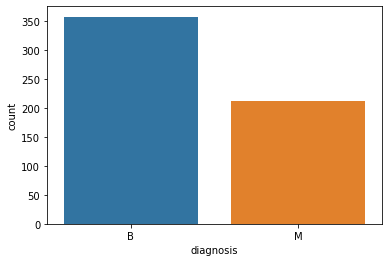

In [8]:
sns.countplot(cancer['diagnosis'])

In [9]:
#Sampling
X = cancer.iloc[:,1:]
print(X.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        12.32         12.39           78.85      464.1          0.10280   
1        10.60         18.95           69.28      346.4          0.09688   
2        11.04         16.83           70.92      373.2          0.10770   
3        11.28         13.39           73.00      384.8          0.11640   
4        15.19         13.21           97.65      711.8          0.07963   

   compactness_mean  concavity_mean  points_mean  symmetry_mean  \
0           0.06981         0.03987      0.03700         0.1959   
1           0.11470         0.06387      0.02642         0.1922   
2           0.07804         0.03046      0.02480         0.1714   
3           0.11360         0.04635      0.04796         0.1771   
4           0.06934         0.03393      0.02657         0.1721   

   dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.05955  ...         13.50          15.64            86.97

In [10]:
y = cancer.iloc[:,:1]
print(y.head())

  diagnosis
0         B
1         B
2         B
3         B
4         B


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)
import sklearn

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455, 1)
(114, 30)
(114, 1)


In [13]:
#Training
#model = LogisticRegression()
#model = neighbors.KNeighborsClassifier()
model = DecisionTreeClassifier(criterion='entropy',max_depth= 8)
#model = SVC(kernel='linear',  gamma = 10, C= 1)


model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [14]:
#Testing
predicted = model.predict(X_test)
predicted

array(['M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B'], dtype=object)

In [15]:
#Evaluation
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predicted))

[[74  4]
 [ 7 29]]


In [16]:
#Classification Report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           B       0.91      0.95      0.93        78
           M       0.88      0.81      0.84        36

    accuracy                           0.90       114
   macro avg       0.90      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114



In [21]:
seed = 7
kfold = sklearn.model_selection.KFold(n_splits=10)

from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X_train,\
     y = y_train, cv = kfold)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))
accuracies

Accuracy Mean 0.918695652173913 Accuracy Variance      0.042012351642041285


array([0.89130435, 0.93478261, 0.89130435, 0.95652174, 0.91304348,
       1.        , 0.84444444, 0.91111111, 0.88888889, 0.95555556])

In [60]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted)

0.9385964912280702

In [61]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[8, 10,12]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [8, 10, 12]})

In [62]:
predicted = clf.predict(X_test)
predicted

array(['M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted)

0.9473684210526315

[Text(911.4000000000001, 713.4749999999999, 'X[22] <= 117.45\nentropy = 0.948\nsamples = 455\nvalue = [288, 167]'),
 Text(632.4000000000001, 618.345, 'X[27] <= 0.111\nentropy = 0.479\nsamples = 320\nvalue = [287, 33]'),
 Text(297.6, 523.2149999999999, 'X[13] <= 45.17\nentropy = 0.119\nsamples = 249\nvalue = [245, 4]'),
 Text(148.8, 428.085, 'X[21] <= 33.35\nentropy = 0.039\nsamples = 242\nvalue = [241, 1]'),
 Text(74.4, 332.955, 'entropy = 0.0\nsamples = 226\nvalue = [226, 0]'),
 Text(223.20000000000002, 332.955, 'X[21] <= 33.56\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(148.8, 237.82500000000005, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 237.82500000000005, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(446.40000000000003, 428.085, 'X[1] <= 17.75\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(372.0, 332.955, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(520.8000000000001, 332.955, 'X[12] <= 4.628\nentropy = 0.811\nsamples = 4\nval

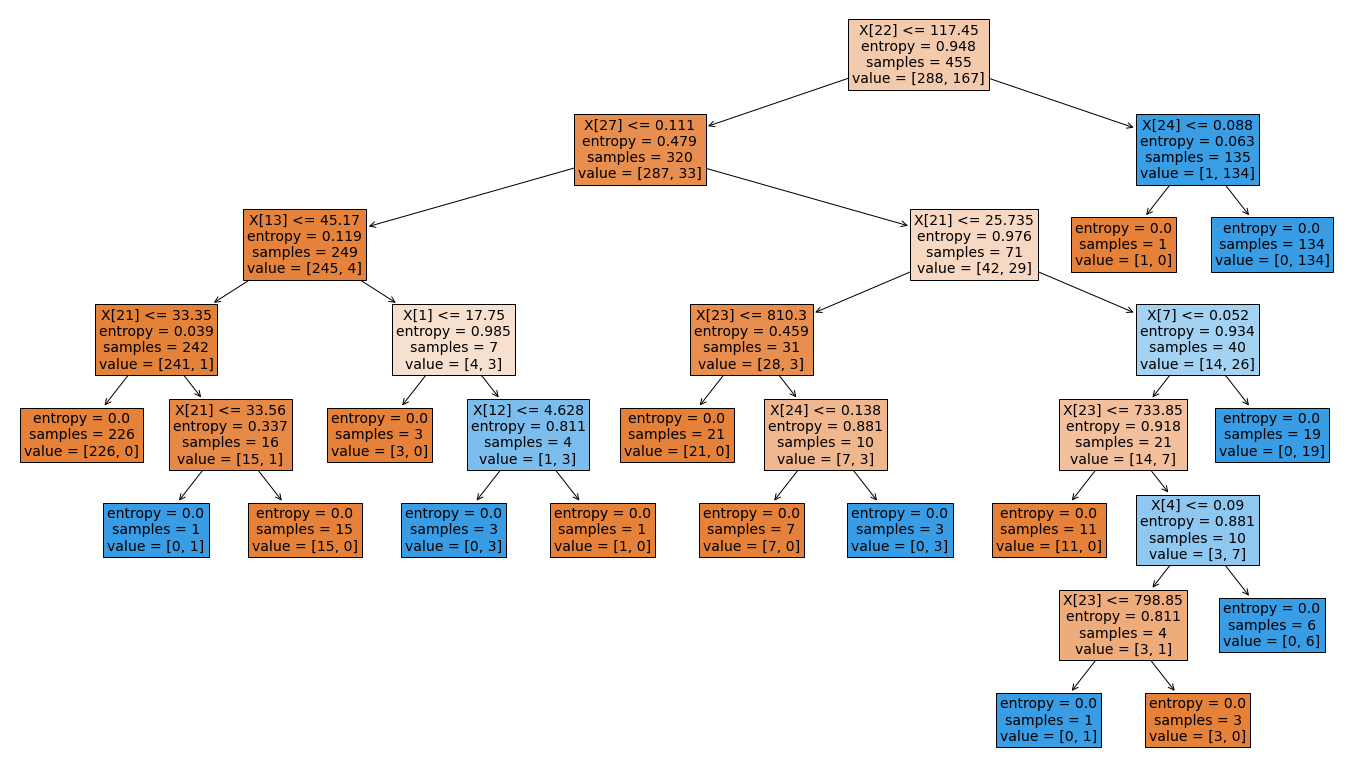

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(24,14))
from sklearn import tree
tree.plot_tree(model, filled=True, fontsize=14)

In [65]:
print(X.columns[20])
print(X.columns[27])
print(X.columns[21])

radius_worst
points_worst
texture_worst


In [66]:
importances = model.feature_importances_
importances

array([0.        , 0.00846217, 0.        , 0.        , 0.01290315,
       0.        , 0.        , 0.04189623, 0.        , 0.        ,
       0.        , 0.        , 0.00752042, 0.03084312, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06268697, 0.62517893, 0.04431626, 0.04015478,
       0.        , 0.        , 0.12603797, 0.        , 0.        ])

In [67]:
np.sort(importances)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00752042, 0.00846217, 0.01290315, 0.03084312, 0.04015478,
       0.04189623, 0.04431626, 0.06268697, 0.12603797, 0.62517893])

In [68]:
# Returns the indices that would sort an array. Now the above importances array's values is sorted in reverse order. 
np.argsort(importances)[::-1]

array([22, 27, 21, 23,  7, 24, 13,  4,  1, 12,  9,  8, 29,  6,  5, 10,  2,
        3, 14, 11, 28, 15, 16, 17, 18, 19, 20, 25, 26,  0], dtype=int64)

In [69]:
import numpy as np
print(X.shape[1])
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
print(model.feature_importances_.argsort()[::-1][:3]) # first 3 best features

30
Feature ranking:
1. feature 22 (0.625179)
2. feature 27 (0.126038)
3. feature 21 (0.062687)
4. feature 23 (0.044316)
5. feature 7 (0.041896)
6. feature 24 (0.040155)
7. feature 13 (0.030843)
8. feature 4 (0.012903)
9. feature 1 (0.008462)
10. feature 12 (0.007520)
11. feature 9 (0.000000)
12. feature 8 (0.000000)
13. feature 29 (0.000000)
14. feature 6 (0.000000)
15. feature 5 (0.000000)
16. feature 10 (0.000000)
17. feature 2 (0.000000)
18. feature 3 (0.000000)
19. feature 14 (0.000000)
20. feature 11 (0.000000)
21. feature 28 (0.000000)
22. feature 15 (0.000000)
23. feature 16 (0.000000)
24. feature 17 (0.000000)
25. feature 18 (0.000000)
26. feature 19 (0.000000)
27. feature 20 (0.000000)
28. feature 25 (0.000000)
29. feature 26 (0.000000)
30. feature 0 (0.000000)
[22 27 21]


# According to Stratified Sampling

In [35]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
print(sss)
for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.1,
            train_size=None)
TRAIN: [  2 464 554 287 369 538 399 409 367 395 173 203 326 114 228 276 432 152
  48 418 451 302 311  80 547 256  12 121 263 350 535  84 146 151 402 319
 533  18 371  32 181  95  78 466 189 457  16 107 401 118 268 317 419 345
  97 225  45 271 449 342 298 220 207  85  20  28 482 130  40 295 258  69
  53 530 229 529  23 310 334 403 346 202 325 262 476 280 526 304 119 333
 293  13 201 473 471 443 278 555 499 435 438 557 323 290 351 191  96 159
 257  65 265 252 321  70 126 314 111  25 462 500 475 336 383 506 534 281
 283 254 374  86 502 103 139 299 348 224 448  17 112 300 370  47   4 478
  66 427 494 559  77 110 361 154  30  72 373 407  43 492 522 335 349 398
 355 186 528 231 415 232 230  61 123 397 392  38 253 511 217   5 491 192
 156 430 389 306  76 149 178  87 174 172 309 275 145  59   3 266 208 338
 459  51 416 512 566 458  55 556 261 523 124  56  50 286 352 327  54 219
 337 360   8  82 240 5

KeyError: "None of [Int64Index([  2, 464, 554, 287, 369, 538, 399, 409, 367, 395,\n            ...\n            138, 215, 213, 421, 404,  93, 212, 246, 260, 362],\n           dtype='int64', length=512)] are in the [columns]"

In [9]:
print(cancer.shape)
print((90/100)*cancer.shape[0])

(569, 31)
512.1


In [14]:
print(cancer.groupby('diagnosis').size())
s = cancer.groupby('diagnosis').size().to_frame()
s['No.of_people_in_sample'] = (512/569)*s[0] # size-of-sample/population-size * layer-size
s

diagnosis
B    357
M    212
dtype: int64


,0,No.of_people_in_sample
diagnosis,,
B,357,321.237258
M,212,190.762742


In [23]:
M_data = cancer.iloc[cancer['diagnosis'] == 'M']
a = cancer.loc[cancer['diagnosis'] == 'M'].sample(191)
vali_a = cancer - a
print(vali_a)
b = cancer.loc[cancer['diagnosis'] == 'B'].sample(321)
print(a.shape)
print(b.shape)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [21]:
y = pd.concat([a,b],axis=0)   
y['diagnosis'].value_counts()

B    321
M    191
Name: diagnosis, dtype: int64

In [22]:
X = y.iloc[:,1:]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
303,13.400,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.081720,0.2116,0.07325,...,16.410,29.66,113.30,844.4,0.1574,0.3856,0.510600,0.20510,0.3585,0.11090
436,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.1243,0.1160,0.221000,0.12940,0.2567,0.05737
360,20.480,21.46,132.50,1306.0,0.08355,0.08348,0.090420,0.060220,0.1467,0.05177,...,24.220,26.17,161.70,1750.0,0.1228,0.2311,0.315800,0.14450,0.2238,0.07127
113,13.730,22.61,93.60,578.3,0.11310,0.22930,0.212800,0.080250,0.2069,0.07682,...,15.030,32.01,108.80,697.7,0.1651,0.7725,0.694300,0.22080,0.3596,0.14310
251,15.660,23.20,110.20,773.5,0.11090,0.31140,0.317600,0.137700,0.2495,0.08104,...,19.850,31.64,143.70,1226.0,0.1504,0.5172,0.618100,0.24620,0.3277,0.10190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,10.940,18.59,70.39,370.0,0.10040,0.07460,0.049440,0.029320,0.1486,0.06615,...,12.400,25.58,82.76,472.4,0.1363,0.1644,0.141200,0.07887,0.2251,0.07732
312,13.700,17.64,87.76,571.1,0.09950,0.07957,0.045480,0.031600,0.1732,0.06088,...,14.960,23.53,95.78,686.5,0.1199,0.1346,0.174200,0.09077,0.2518,0.06960
191,11.930,10.91,76.14,442.7,0.08872,0.05242,0.026060,0.017960,0.1601,0.05541,...,13.800,20.14,87.64,589.5,0.1374,0.1575,0.151400,0.06876,0.2460,0.07262
447,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,...,13.070,22.25,82.74,523.4,0.1013,0.0739,0.007732,0.02796,0.2171,0.07037
